In [5]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np  # Added for converting list to NumPy array

# Load the data
df = pd.read_csv('IA3-1.csv')

# Preprocess the data: split the 'description' column into lists of tags
df['processed_description'] = df['description'].apply(lambda x: x.split(','))

# Combine all descriptions into a single list of sentences (lists of tags)
sentences = df['processed_description'].tolist()

# Initialize and train the Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)

# Display the vector for 'Toyota Camry'
toyota_camry_vector = model.wv['Toyota Camry']
print(f"The vector for the Toyota Camry is': {toyota_camry_vector}")

The vector for the Toyota Camry is': [ 0.00345154  0.05496184  0.04102072 -0.05022662 -0.0648846  -0.09337194
 -0.00690697  0.124635   -0.07794087 -0.0320152   0.04307402 -0.01486186
  0.02773878 -0.01147099  0.00512638  0.04969491  0.06411489  0.13164613
 -0.08737848 -0.15197185 -0.04794927 -0.03925099  0.14983252  0.0702292
  0.08210006 -0.00345423 -0.00193678  0.16809468 -0.03599215  0.01023318
  0.01463694  0.04242183  0.03679404 -0.0051835   0.04598662 -0.09346418
  0.05737079 -0.04543929 -0.01212021  0.00348224  0.02682368 -0.01733139
 -0.12087236  0.00163471  0.15603085  0.00608905 -0.03280125 -0.05349279
 -0.01610255  0.00859009]


In [6]:
# Compute the similarity between 'Porsche 718 Cayman' and 'Nissan Van'
similarity = model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')
print(f"Similarity between 'Porsche 718 Cayman' and 'Nissan Van': {similarity}")

Similarity between 'Porsche 718 Cayman' and 'Nissan Van': 0.5796422958374023


In [7]:
# Find the five most similar to 'Mercedes-Benz SLK-Class'
similar_to_mercedes = model.wv.most_similar('Mercedes-Benz SLK-Class', topn=5)
print("Most similar to 'Mercedes-Benz SLK-Class':")
print(similar_to_mercedes)

Most similar to 'Mercedes-Benz SLK-Class':
[('Porsche Boxster', 0.9682933688163757), ('Scion FR-S', 0.9678310751914978), ('Mercedes-Benz CLK-Class', 0.9636955857276917), ('BMW 2 Series', 0.963203489780426), ('Hyundai Genesis Coupe', 0.9621816277503967)]


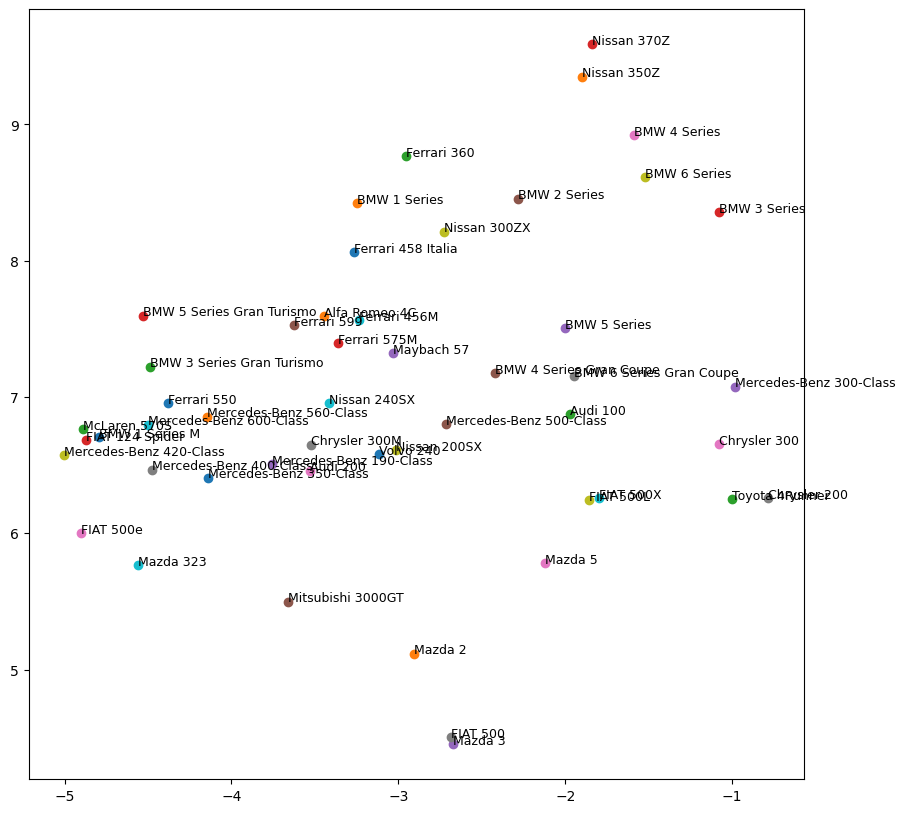

In [8]:
# Generate a t-SNE graph for a list of 50 unique cars
unique_cars = df['Maker_Model'].drop_duplicates().tolist()[:50]
vectors = [model.wv[car] for car in unique_cars]

# Convert the list of vectors into a NumPy array
vectors_array = np.array(vectors)

# Use t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(vectors_array)  # Use the NumPy array here

# Plot the t-SNE result
plt.figure(figsize=(10,10))
for i, label in enumerate(unique_cars):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.annotate(label, (x, y), fontsize=9)
plt.show()